# INTRODUCTION - TBC 

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


PATH="./all"


In [7]:
train_df = pd.read_csv(PATH+"/train.csv")
test_df = pd.read_csv(PATH+"/test.csv")

train_df.head()
test_df.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
dtype_df = train_df.dtypes.reset_index() # Need to include reset_index to get a dataframe
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type", as_index= False).count()

,Column Type,Count
0,int64,3147
1,float64,1845
2,object,1


count    4.459000e+03
mean     5.944923e+06
std      8.234312e+06
min      3.000000e+04
25%      6.000000e+05
50%      2.260000e+06
75%      8.000000e+06
max      4.000000e+07
Name: target, dtype: float64

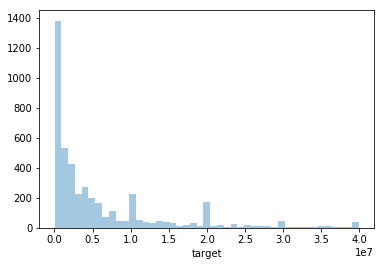

In [9]:
# Explore target variable 
train_df.target.describe()

sns.distplot(train_df['target'], kde=False)

<Container object of 5 artists>

([<matplotlib.axis.XTick at 0x26df9164400>,
 <a list of 5 Text xticklabel objects>)

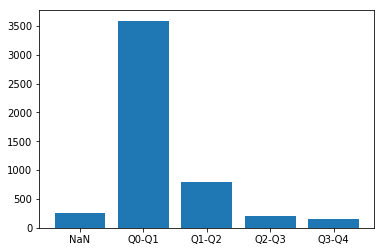

In [10]:

corr_target = train_df.drop(["ID","target"],axis = 1).corrwith(train_df.target)
summ = pd.cut(corr_target, 4, labels= ["Q0-Q1","Q1-Q2","Q2-Q3","Q3-Q4"])
summ = summ.astype(object).fillna('NaN')
plt_corr = summ.groupby(summ).count()

## See the number of variable in 5 group in a plot 

plt.figure()
y_point = np.arange(len(plt_corr))
# Create bars
plt.bar(y_point, plt_corr)
 
# Create names on the x-axis
plt.xticks(y_point, plt_corr.index)
 
# Show graphic
plt.show()





In [11]:
col_corr_NaN = corr_target[corr_target.isna()].index.values
len(col_corr_NaN)
train_df_non_NA_corr = train_df.loc[:, ~train_df.columns.isin(list(col_corr_NaN))]
train_df_non_NA_corr.head()


256

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [12]:
import numpy as np
train_df_non_NA_corr.drop(["ID","target"],axis = 1).apply(np.std,axis= 0).sort_values(ascending= True).head()

f23c83554    29.947637
c6776639f    29.947637
604ac0633    29.947637
403b0e1e4    29.947637
940c3b22f    59.895273
dtype: float64

## Exploratory Analysis
TBC - Sparse data // Most Corr values positively 

In [13]:
corr_plot = pd.DataFrame(data= corr_target[~corr_target.isna()], 
                         index= corr_target[~corr_target.isna()].index)
corr_plot.sort_values(by= corr_plot.columns[0],ascending= False, inplace= True)   


,0
555f18bd3,0.273379
9fd594eec,0.270019
5bc7ab64f,0.267858
cbbc9c431,0.265005
f190486d6,0.263821


(<matplotlib.figure.Figure at 0x26d92305438>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26d92305a58>)

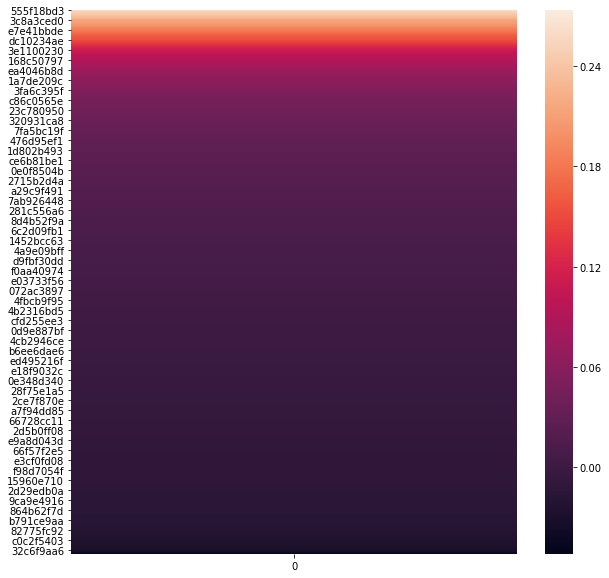

In [73]:
corr_plot.head()

plt.subplots(figsize=(10,10))
sns.heatmap(corr_plot, annot=False, fmt="g")


(<matplotlib.figure.Figure at 0x26de0097470>,
 <matplotlib.axes._subplots.AxesSubplot at 0x26de00ad240>)

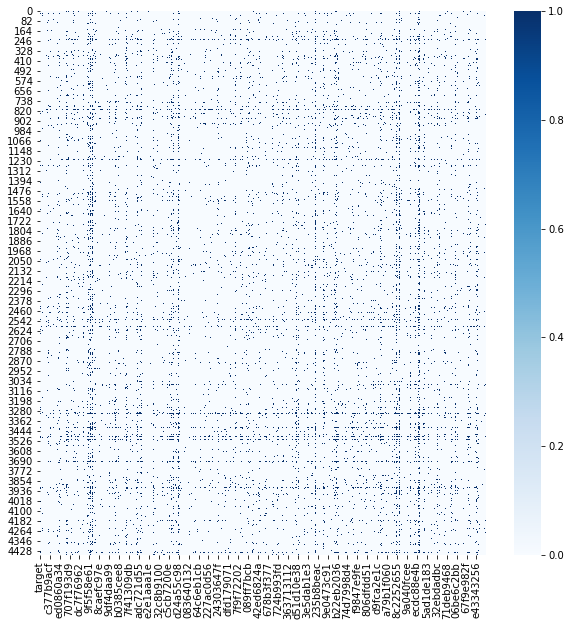

In [15]:
## Study the sparsity per column 
plt.subplots(figsize=(10,10))
sns.heatmap(train_df.drop(["ID"],axis = 1)
            , annot=False, fmt="g",cmap="Blues",vmax= 1, vmin=0)
plt.show()

# we have a highly sparse data along all the data set

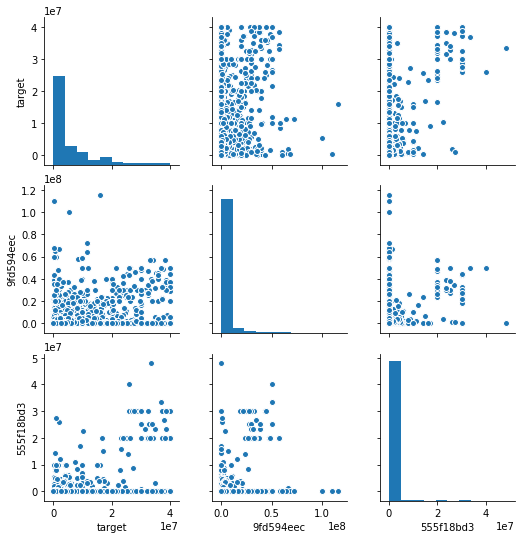

In [16]:
col_corr = corr_plot.head(2).index.tolist()
col_corr.append("target")

# without regression
df = train_df.loc[:,train_df.columns.isin(col_corr)]
sns.pairplot(df, kind="scatter")
plt.show()


## Modelling 
TBC - PCA / XGBoost 

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 0.95, svd_solver = 'full') # svd_solver = full - n_components € [0,1] # percetange variance explain 
aux = train_df.drop(["ID","target"],axis = 1)
pca_iris = pca.fit(aux)
pca.n_components_
pca.explained_variance_ratio_.sum()
var_cum = pca.explained_variance_ratio_.cumsum()


602

0.9501153242731664

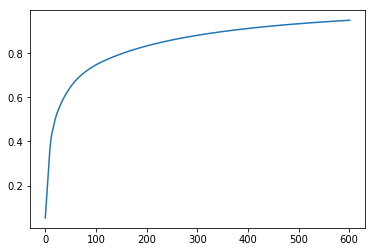

In [55]:
train_df_x_pca = pca.transform(aux)
test_df_pca = pca.transform(test_df.drop(["ID"], axis = 1))

plt.figure()
plt.plot(range(len(var_cum)),var_cum)
plt.show()


In [61]:
from xgboost import XGBRegressor

seed = 7
# fit model  training data
model = XGBRegressor()
model.fit(train_df_x_pca, train_df.target)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [71]:
# Prediction
prediction = model.predict(test_df_pca)
prediction[prediction < 0] = 0 

a = model.feature_importances_

## Submission 
TBC 

In [72]:
sub = test_df[['ID']].copy()
sub['target'] = prediction
sub[['ID', 'target']].to_csv('submission.csv', index=False)